In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

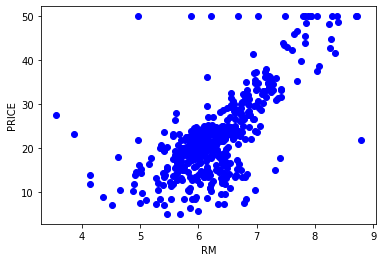

In [14]:
boston_data = load_boston()
# lay du lieu o cot 5
X = boston_data.data[:, 5, np.newaxis]
# taget la gia nha
y = boston_data.target[:, np.newaxis]

plt.plot(X, y, 'bo')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()
         


In [16]:
# scale data tranh lam tran phep tinh
scalerx = StandardScaler()
scalery = StandardScaler()
X_scaled = scalerx.fit_transform(X)
y_scaled = scalery.fit_transform(y)

# chia du lieu thanh tap train va tap test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 1)
(127, 1)
(379, 1)
(127, 1)


In [18]:
# su dung model LinearRegression 
model = LinearRegression()
# Train data
model.fit(X_train, y_train)


LinearRegression()

In [20]:
# thuc hien train model tren tap test
y_hat = model.predict(X_test)

#  Tinh Loss bang MSE
mse = mean_squared_error(y_hat, y_test)
print(mse)



0.8410034211021145


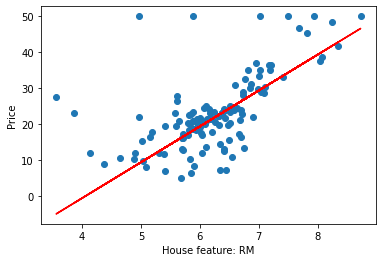

In [26]:
plt.scatter(scalerx.inverse_transform(X_test), scalery.inverse_transform(y_test))
plt.plot(scalerx.inverse_transform(X_test), scalery.inverse_transform(y_hat),'r')
plt.xlabel('House feature: RM')
plt.ylabel('Price')
plt.show()
              

In [28]:
# in weight w0, w1 ma model cua sklearn da hoc w1,w0
print(model.coef_, model.intercept_)

[[0.76425575]] [-0.03988032]


In [29]:
Tinh gradient desent
class GDLinearRegression:
    # khoi tao learning rate va khoi tao step de update  w
    def __init__(self, lr,step):
        self.lr = lr
        self.step = step
        
    ## Train the model voi dau vao la tap train data X cung nhan Y
    ##X la ma tran MxN trong do MxN trong do  M la so luong diem du lieu co N chieu
    ## Truong hop du lieu 1 chieu thi X la vector cot Mx1
    ## Lay ra so luong diem train_size va so chieu du lieu n_features
    
    def fit(self, X, y):
        self.n_features = X.shape[1] if len(X.shape)> 1 else 1
        train_size = len(X) # so luong sample
        
        # chuan hoa lai dinh dang du lieu 
        X = X.reshape(-1, self.n_features)#in ra so phan tu trong row dua vao n feature
        y = y.reshape([-1,1])
        
        # ta muon thuc hien du doan  y = X.T*W + bias, ta dua bias vao w(W|bias) va 1 cot toan 1 vao X(X|one)
        #luc do viec tinh toan thuan tien hon y = (X|one).T*(W|bias)
        one = np.ones([train_size, 1])
        X = np.concatenate([X,one], 1)
        
        #Tao weight chinh la tham so ta se optimize trong qua trinh train
        self.weight = np.zeros([self.n_features+1,1])
        print('x shape:',X.shape,'-y shape:', y.shape,'-weight shape:', self.weight.shape,'train_size:',train_size)
        
        # mang luu lai toan bo gia tri loss trong qua trinh train
        self.train_loss = []
        
        # train
        for i in range(self.step):
            
            loss = np.sum((y - np.dot(X, self.weight)) ** 2)
            delta = np.dot(X.T, ( np.dot(X, self.weight) - y))
            
            # update weight
            self.weight = self.weight - (self.lr/train_size) * delta
            
            # tinh trung binh loss
            loss = loss/train_size
            self.train_loss.append(loss.item())
            
        
          # Thuc hien du doan   
    def predict(self, X):
        # chuan hoa format du lieu nhu ta da lam trong luc train
        X = X.reshape(-1, self.n_features)

        # them cot one nhu ta da lam trong luc train
        one = np.ones([len(X), 1])
        X = np.concatenate([X, one],1)

        # Thuc hien du doan, don gian la nhan ma tran
        y_hat = np.dot(X, self.weight)

        return y_hat

    def print_weight(self):
            # In weight da hoc duoc
        print(self.weight)

    def get_train_loss(self):
        # tra ve train loss da luu trong qua trinh train
        return self.train_loss
    


x shape: (379, 2) -y shape: (379, 1) -weight shape: (2, 1) train_size: 379


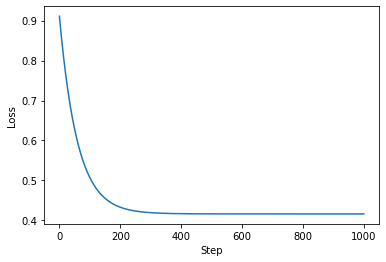

In [30]:
# implement GDLinearRegression
# learning rate la 0.01 step la 1000
mymodel = GDLinearRegression(0.01, 1000)
# thuc hien train du lieu
mymodel.fit(X_train, y_train)

# ve bieu do trainnig loss
train_loss = mymodel.get_train_loss()
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

In [32]:
# thuc hien du doan tren tap test
y_hat = mymodel.predict(X_test)
mse = mean_squared_error(y_hat,y_test)

# Tinh Loss bang mse tren tap test
print('Test MSE:', mse)

Test MSE: 0.8409066493899056


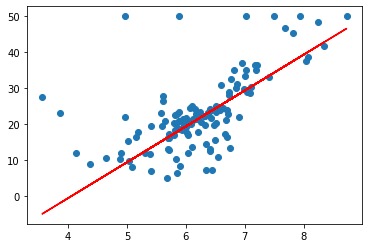

In [34]:
plt.scatter(scalerx.inverse_transform(X_test),scalery.inverse_transform(y_test))
plt.plot(scalerx.inverse_transform(X_test), scalery.inverse_transform(y_hat),'r')
plt.show()

In [35]:
mymodel.print_weight()

[[ 0.76409572]
 [-0.03985215]]
